# `pc_curve`
This single method can convert either (a) images containing invasion size or (b) invasion pressure results, such as those produced by ``porosimetry`` and ``drainage``, respectively.  

In [1]:
import porespy as ps
import numpy as np
import matplotlib.pyplot as plt

Generate an image and apply the ``porosimetry`` function:

In [2]:
np.random.seed(0)
im = ps.generators.blobs(shape=[200, 200], porosity=0.6)
drainage = ps.filters.porosimetry(im)

  0%|          | 0/25 [00:00<?, ?it/s]

## `sizes`
The porosimetry function returns an image indicating the radius of the capillary meniscus that at which is was invaded. In this case the Washburn equation is used to convert sizes to capillary pressures, surface tension (``sigma``) and contact (``theta``) must be provided, as well as voxel size (``voxel_size``) if the ``sizes`` array is in units of voxels.

In [3]:
data = ps.metrics.pc_curve(im=im, sizes=drainage, voxel_size=1e-5)

  0%|          | 0/21 [00:00<?, ?it/s]

The function results a ``Results`` object, whose attributes can be inspected by printing:

In [4]:
print(data)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Item                      Description
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
pc                        [407.8608703277795, 815.721740655559, 924.1694802519894, 1047.0350190039558, 1186.2351597260008, 1343.9415383726086, 1522.6145033338332, 1725.041498880861, 1954.3805515746424, 2214.2095380610917, 2508.582002870727, 2842.090397026047, 3219.9377240305935, 3648.018710975678, 4133.011771100392, 4682.483192495964, 5305.005178383415, 6809.339411869592, 7714.620502905222, 11218.720341000993, 14399.999999999998]
snwp                      [0.0, 0.04955537590945837, 0.07877930476960388, 0.0881568310428456, 0.09280517380759903, 0.21883589329021827, 0.2791430881164107, 0.3557801131770412, 0.4190784155214228, 0.6601455133387227, 0.8425222312045271, 0.8719482619240096, 0.9545675020210186, 0.9654405820533549, 0.9690379951495554, 0.9706548100242522, 0.9867016976556184, 0.987065481002

Matplotlib can be used to plot the curve:

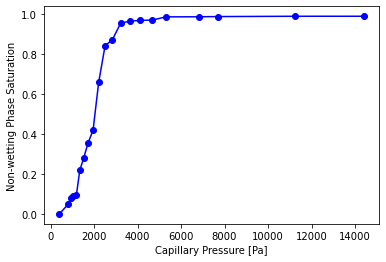

In [5]:
plt.plot(data.pc, data.snwp, 'b-o')
plt.xlabel('Capillary Pressure [Pa]')
plt.ylabel('Non-wetting Phase Saturation');

Or, other options:

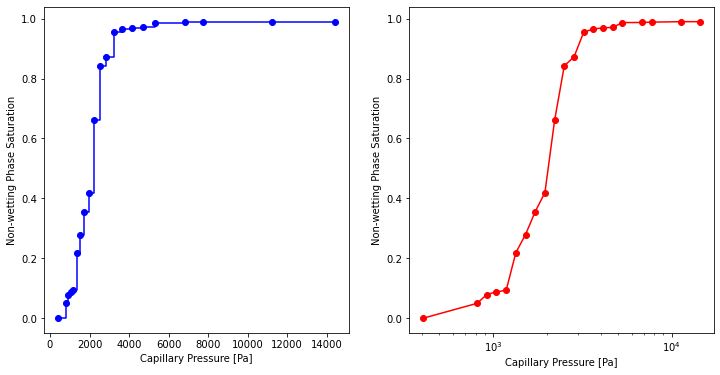

In [6]:
fig, ax = plt.subplots(1, 2, figsize=[12, 6])
ax[0].step(data.pc, data.snwp, 'b-o', where='post')
ax[0].set_xlabel('Capillary Pressure [Pa]')
ax[0].set_ylabel('Non-wetting Phase Saturation')
ax[1].semilogx(data.pc, data.snwp, 'r-o')
ax[1].set_xlabel('Capillary Pressure [Pa]')
ax[1].set_ylabel('Non-wetting Phase Saturation');

## ``pc``
In this case no additional information is needed since the sizes have been converted to capillary pressure already, either by a previous function, or by hand.

In [7]:
sigma = 0.072
theta = 180
voxel_size = 1e-5
pc = -2*sigma*np.cos(np.deg2rad(theta))/(drainage*voxel_size)

  0%|          | 0/22 [00:00<?, ?it/s]

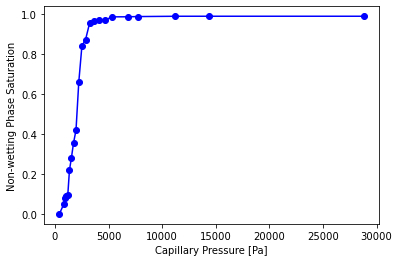

In [8]:
data = ps.metrics.pc_curve(im=im, pc=pc)
plt.plot(data.pc, data.snwp, 'b-o')
plt.xlabel('Capillary Pressure [Pa]')
plt.ylabel('Non-wetting Phase Saturation');

Note that some voxels in ``pc`` had a value of ``np.inf`` since they were uninvaded.  The ``pc_curve`` function replaces these with ``2*pressure.max()`` to improve the plotting. 